### 1. Load Libraries

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import missingno as msno
import plotly.express as px    
import folium  
from folium import plugins
from skimpy import skim 

plt.rcParams["figure.figsize"] = (6,4)
from matplotlib.colors import LinearSegmentedColormap  

import warnings  
warnings.filterwarnings("ignore")  
warnings.warn("this will not show")  

pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('online_sales_dataset.csv')

### 2. Data Preprocessing and Cleaning

In [3]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,1/1/2020 0:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,1/1/2020 1:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,1/1/2020 2:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,1/1/2020 3:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,1/1/2020 4:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [4]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   22.37 │   17.92 │     -50 │     11 │     23 │     37 │      49 │    ▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   47.54 │   33.48 │  -99.98 │  23.59 │  48.92 │  74.61 │     100 │    ▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

#### Basic statistics for numerical columns

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,49782.0,550681.239946,260703.009944,100005.00,324543.0000,552244.00,776364.00,999997.000000
Quantity,49782.0,22.372343,17.917774,-50.00,11.0000,23.00,37.00,49.000000
UnitPrice,49782.0,47.537862,33.479510,-99.98,23.5925,48.92,74.61,100.000000
CustomerID,44804.0,55032.871775,25913.660157,10001.00,32750.7500,55165.00,77306.25,99998.000000
Discount,49782.0,0.275748,0.230077,0.00,0.1300,0.26,0.38,1.999764
ShippingCost,47293.0,17.494529,7.220557,5.00,11.2200,17.50,23.72,30.000000


#### Fixing inconsistent values in 'UnitPrice'

In [7]:
df[df["UnitPrice"] < 0]["UnitPrice"].count()

1493

There are 1,493 negative values in the column by applying the following condition.

In [8]:
# Transforming negative values to positive
df["UnitPrice"] = df["UnitPrice"].abs() 

In [9]:
df[df["UnitPrice"] < 0]["UnitPrice"].count()

0

#### Cleaning up negative or unrealistic values in 'Quantity'

In [10]:
df[df["Quantity"] < 0]["Quantity"].count()

2489

In [11]:
df["Quantity"] = df["Quantity"].abs() 

In [12]:
df[df["Quantity"] < 0]["Quantity"].count()

0

In [13]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 49782  │ │ string      │ 11    │                                                          │
│ │ Number of columns │ 17     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name    ┃ NA    ┃ NA %  ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ InvoiceNo      │     0 │     0 │  550700 │  260700 │  100000 │ 324500 │ 552200 │ 776400 │ 1000000 │ ▇▇▇▇▇▇ │  │
│ │ Quantity       │     0 │     0 │   24.93 │   14.15 │       1 │     13 │     25 │     37 │      50 │ ▇▇▇▇▇▇ │  │
│ │ UnitPrice      │     0 │     0 │   50.63 │    28.6 │       1 │  25.86 │  50.55 │  75.37 │     100 │ ▇▇▇▇▇▇ │  │
│ │ CustomerID     │  4978 │    10 │   55030 │   25910 │   10000 │  32750 │  55160 │  77310 │  100000 │ ▇▇▇▇▇▇ │  │
│ │ Discount       │     0 │     0 │  0.2757 │  0.2301 │       0 │   0.13 │   0.26 │   0.38 │       2 │   ▇▃   │  │
│ │ ShippingCost   │  2489 │     5 │   17.49 │   7.221 │       5 │  11.22 │   17.5 │  23.72 │      30 │ ▇▇▇▇▇▇ │  │
│ └────────────────┴───────┴───────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA        ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ StockCode                        │         0 │         0 │                        1 │                49782 │  │
│ │ Description                      │         0 │         0 │                      1.6 │                81539 │  │
│ │ InvoiceDate                      │         0 │         0 │                        2 │                99564 │  │
│ │ Country                          │         0 │         0 │                      1.2 │                58020 │  │
│ │ PaymentMethod                    │         0 │         0 │                      1.7 │                83059 │  │
│ │ Category                         │         0 │         0 │                        1 │                49782 │  │
│ │ SalesChannel                     │         0 │         0 │                        1 │                49782 │  │
│ │ ReturnStatus                     │         0 │         0 │                      1.9 │                94670 │  │
│ │ ShipmentProvider                 │         0 │         0 │                      1.2 │                62205 │  │
│ │ WarehouseLocation                │      3485 │         7 │                     0.93 │                46297 │  │
│ │ OrderPriority                    │         0 │      

#### Standardizing the 'PaymentMethod' column

In [14]:
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
paypall          16505
Name: count, dtype: int64

In [15]:
# updating the "paypall" payment method to "Paypall" 
df["PaymentMethod"].replace("paypall", "Paypall", inplace=True)

In [16]:
df["PaymentMethod"].value_counts()

PaymentMethod
Bank Transfer    16747
Credit Card      16530
Paypall          16505
Name: count, dtype: int64

#### Standardizing the 'StockCode' column

In [17]:
df["StockCode"] = df["StockCode"].str.lstrip("SKU_").astype("int")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  int32  
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

#### Standardizing the 'CustomerID' column

In [19]:
df["CustomerID"].head(5)

0    37039.0
1    19144.0
2    50472.0
3    96586.0
4        NaN
Name: CustomerID, dtype: float64

In [20]:
# Converting 'CustomerID' column to 'Object' data type to fill 'NaN' as 'Unknown'. 
df["CustomerID"] = df["CustomerID"].astype("object")

In [21]:
# filling in NaN values.
df["CustomerID"].fillna("Unknown", inplace=True)

In [22]:
# changing the data type to 'str' to delete the redundant value '.0'.
df["CustomerID"] = df["CustomerID"].astype("str").str.rstrip("0").str.rstrip(".")

In [23]:
df["CustomerID"].head(5)

0      37039
1      19144
2      50472
3      96586
4    Unknown
Name: CustomerID, dtype: object

#### Standardizing the 'Discount' column

In [24]:
df["Discount"].head()

0    0.470000
1    0.190000
2    0.350000
3    0.140000
4    1.501433
Name: Discount, dtype: float64

In [25]:
# Arranging it to have 2 digits after the dot with the 'Round' parameter.
df["Discount"] = df["Discount"].round(2)

In [26]:
df["Discount"].head()

0    0.47
1    0.19
2    0.35
3    0.14
4    1.50
Name: Discount, dtype: float64

#### Detection and filling of missing values(ShippingCost)

“ShippingCost” column has no significant relationship with the other columns. Therefore, I decided that it would be most appropriate to fill the “ShippingCost” column with its average value. I supported my decision by grouping the “Country”, “ShipmentProvider” and “WarehouseLocation” columns according to the “ShippingCost” column and observing that the average values of these groups are close to the overall “ShippingCost” average. 

In [27]:
df.isnull().sum()

InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID              0
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [28]:
# “ShippingCost” column average value calculation
df["ShippingCost"].mean()

17.49452921151122

In [29]:
# “ShippingCost” average value based on “Country” column
df.groupby("Country")["ShippingCost"].mean().mean()

17.49455195055477

In [30]:
# “ShippingCost” average value based on "ShipmentProvider" column
df.groupby("ShipmentProvider")["ShippingCost"].mean().mean()

17.494364720265526

In [31]:
# “ShippingCost” average value based on "WarehouseLocation" column
df.groupby("WarehouseLocation")["ShippingCost"].mean().mean()

17.48266955767786

In [32]:
# Filling the “ShippingCost” column NaN values.
df["ShippingCost"].fillna(17.49, inplace=True)

#### Detection and filling of missing values(WarehouseLocation)

To fill the NaN values of the 'WarehouseLocation' column, we checked if there is a relationship with the other columns. We did not find any relationship, so we found it appropriate to fill the NaN values randomly.

In [33]:
df["WarehouseLocation"].head(5)

0    London
1      Rome
2    Berlin
3      Rome
4       NaN
Name: WarehouseLocation, dtype: object

In [34]:
# Checking the current values.
df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    9458
London       9230
Rome         9226
Berlin       9210
Paris        9173
Name: count, dtype: int64

In [35]:
# The unique version except for NaN.
warehouse_locations = df['WarehouseLocation'].dropna().unique()
warehouse_locations

array(['London', 'Rome', 'Berlin', 'Amsterdam', 'Paris'], dtype=object)

In [36]:
# Fills the NaN values in the 'WarehouseLocation' cell by randomly selecting from the values in Warehouse_locations.
df['WarehouseLocation'] =  df['WarehouseLocation'].apply(lambda x: np.random.choice(warehouse_locations) if pd.isna(x) else x)

In [37]:
# Latest status after filling
df["WarehouseLocation"].value_counts()

WarehouseLocation
Amsterdam    10153
Berlin        9981
London        9903
Rome          9899
Paris         9846
Name: count, dtype: int64

In [38]:
# Checked that the NaN values are full.
df.isnull().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

In [39]:
# Numerical columns statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,49782.0,550681.239946,260703.009944,100005.0,324543.0000,552244.000,776364.00,999997.0
StockCode,49782.0,1497.690029,288.660958,1000.0,1248.0000,1495.000,1748.00,1999.0
Quantity,49782.0,24.925555,14.152125,1.0,13.0000,25.000,37.00,50.0
UnitPrice,49782.0,50.625031,28.597658,1.0,25.8625,50.555,75.37,100.0
Discount,49782.0,0.275750,0.230086,0.0,0.1300,0.260,0.38,2.0
ShippingCost,49782.0,17.494303,7.037732,5.0,11.5400,17.490,23.41,30.0


### 3. Detecting and Handling Outliers

In [40]:
# Example: Removing outliers
# df = df[df['UnitPrice'] < df['UnitPrice'].quantile(0.99)]

#### Detecting and Handling Outliers in 'Quantity'

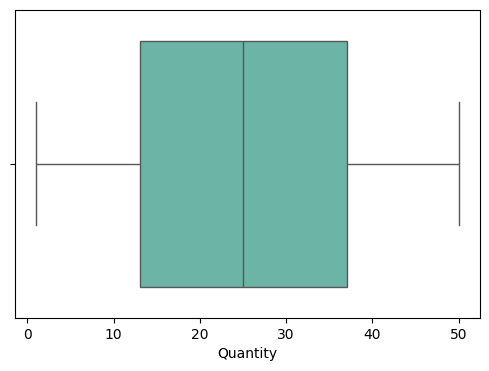

In [41]:
sns.boxplot(data = df, x = "Quantity", color="#60C1AD" );

No outlier value in the “Quantity” column

#### Detecting and Handling Outliers in 'UnitPrice'                      

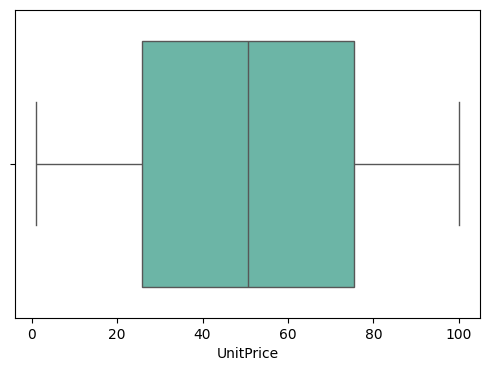

In [42]:
sns.boxplot(data = df, x = "UnitPrice", color="#60C1AD");

No outlier value in the “UnitPrice” column

#### Detecting and Handling Outliers in 'Discount'

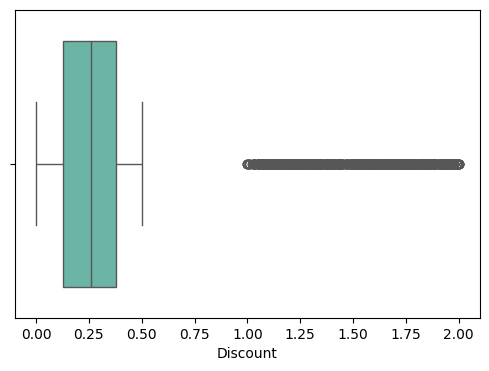

In [43]:
sns.boxplot(data = df, x = "Discount", color="#60C1AD");

Outlier is present in “Discount” column.

In [44]:
# Number of outlier values.
df[df["Discount"] > 0.755]["Discount"].count()

996

In [45]:
# Finding Q1, Q2, Q3.
Q1=df["Discount"].quantile(0.25)
Q2=df["Discount"].quantile(0.50)
Q3=df["Discount"].quantile(0.75)
print(f"Q1={Q1}, Q2={Q2}, Q3={Q3}")

Q1=0.13, Q2=0.26, Q3=0.38


In [46]:
# Finding IQR, MIN, MAX values.
# Q1=0.13,Q2=0.26,Q3=0.38
# IQR= Q3-Q1 -->  0.38- 0.13= 0.25
# MİN= Q1-(1.5 * IQR) --> 0.13-(1.5 * 0.25) = - 0,245
# MAX= Q3+(1.5 * IQR) --> 0.38+(1.5 * 0.25) = 0,755

In [47]:
# With reference to the MAX value, all values above 0.755 are considred outliers and was removed.
df = df[df["Discount"] <= 0.755]

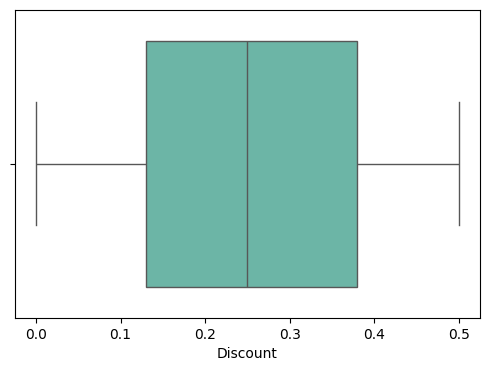

In [48]:
# Here we have seen that auliner values have been deleted.
sns.boxplot(data = df, x = "Discount", color="#60C1AD");

#### Detecting and Handling Outliers in 'ShippingCost'

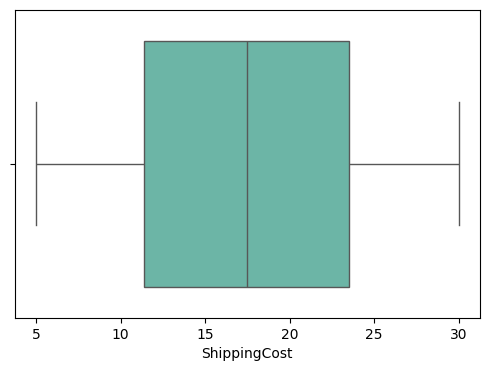

In [49]:
sns.boxplot(data = df, x = "ShippingCost", color="#60C1AD");

No outliers value in the “ShippingCost” column

### 4. Feature Engineering

Create new feature 'TotalCost'

Extracting Day of the Week from 'InvoiceDate'

Extracting Month from 'InvoiceDate'

In [117]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,InvoiceSeason,Revenue
0,221958,1964,White Mug,38,1.71,37039,Australia,0.47,Bank Transfer,10.79,Accessory,In-store,Not Returned,UPS,London,Medium,45.23,2020,1,1,00:00:00,Winter,47.12
1,771155,1241,White Mug,18,41.25,19144,Spain,0.19,Paypall,9.51,Accessory,Online,Not Returned,UPS,Rome,Medium,610.93,2020,1,1,01:00:00,Winter,739.08
2,231932,1501,Headphones,49,29.11,50472,Germany,0.35,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,950.18,2020,1,1,02:00:00,Winter,1409.24
3,465838,1760,Desk Lamp,14,76.68,96586,Netherlands,0.14,Paypall,11.08,Accessory,Online,Not Returned,Royal Mail,Rome,Low,934.31,2020,1,1,03:00:00,Winter,1071.56
5,744167,1006,Office Chair,47,70.16,53887,Sweden,0.48,Credit Card,13.98,Furniture,Online,Not Returned,DHL,London,Medium,1728.69,2020,1,1,05:00:00,Winter,3274.96


#### Create new feature 'TotalCost'

In [51]:
# Calculated the total cost.
df["TotalCost"] = ((df["Quantity"] * df["UnitPrice"]) - ((df["Quantity"] * df["UnitPrice"]) * 
                  df["Discount"]) + df["ShippingCost"]).round(2)

In [52]:
df.sample(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost
1506,912831,1958,Notebook,6,3/3/2020 18:00,75.16,83975,Netherlands,0.22,Bank Transfer,8.94,Electronics,In-store,Not Returned,FedEx,Paris,Medium,360.69


#### Separate year, month, day and hour from 'InvoiceDate' column

In [53]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost
0,221958,1964,White Mug,38,1/1/2020 0:00,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23


In [54]:
# Converting the 'InvoiceDate' column to date format.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [55]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost
0,221958,1964,White Mug,38,2020-01-01,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23


In [56]:
# Created a column named “InvoiceYear”.
df["InvoiceYear"] = df['InvoiceDate'].dt.year

In [57]:
# Created a column named “InvoiceYear”.
df["InvoiceMonth"] = df['InvoiceDate'].dt.month

In [58]:
# Created a column named “InvoiceDay”.
df["InvoiceDay"] = df['InvoiceDate'].dt.day

In [59]:
# Created a column named “InvoiceTime”.
df["InvoiceTime"] = df['InvoiceDate'].dt.time

In [60]:
# I deleted the 'InvoiceDate' column because I have more details columns on it.
df = df.drop('InvoiceDate', axis=1)

In [61]:
df.head(1)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,TotalCost,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime
0,221958,1964,White Mug,38,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,45.23,2020,1,1,00:00:00


#### Correction of incorrect Category Column

In [62]:
df.groupby(["Category","Description"]).size()

Category     Description   
Accessories  Backpack          904
             Blue Pen          864
             Desk Lamp         877
             Headphones        859
             Notebook          911
             Office Chair      902
             T-shirt           852
             USB Cable         883
             Wall Clock        925
             White Mug         919
             Wireless Mouse    877
Apparel      Backpack          864
             Blue Pen          895
             Desk Lamp         898
             Headphones        907
             Notebook          835
             Office Chair      878
             T-shirt           899
             USB Cable         911
             Wall Clock        895
             White Mug         841
             Wireless Mouse    861
Electronics  Backpack          878
             Blue Pen          876
             Desk Lamp         894
             Headphones        894
             Notebook          852
             Office Chair  

I observed that some "Description" appears in more than one "Category". E.g "Blue Pen" appears in Accessories, Apparel and Electronics

In [63]:
# Correct grouping for the Category column.
Category = {
    'Backpack': 'Accessory',  
    'Blue Pen': 'Stationer',
    'Notebook': 'Stationer',
    'Office Chair': 'Furniture',
    'Wall Clock': 'Accessory',
    'White Mug': 'Accessory',
    'Wireless Mouse': 'Electronics',
    'USB Cable': 'Electronics',
    'Headphones': 'Electronics',
    'T-shirt': 'Apparel',
    'Desk Lamp':'Accessory'
}

In [64]:
# Updated the “Category” column with the grouping.
df['Category'] = df['Description'].map(Category)

In [65]:
# Upadted status of Category column.
df.groupby(["Category","Description"]).size()

Category     Description   
Accessory    Backpack          4480
             Desk Lamp         4456
             Wall Clock        4501
             White Mug         4451
Apparel      T-shirt           4381
Electronics  Headphones        4450
             USB Cable         4502
             Wireless Mouse    4354
Furniture    Office Chair      4431
Stationer    Blue Pen          4417
             Notebook          4363
dtype: int64

### 5. Data Visualization

#### Sales Distribution by Country

In [66]:
# Country-based total sales volume calculation.
total_cost_by_country = df.groupby("Country")[["TotalCost"]].sum().sort_values("TotalCost", ascending = False ).reset_index()
total_cost_by_country

,Country,TotalCost
0,Belgium,4039735.26
1,Sweden,3986722.16
2,United Kingdom,3985433.67
3,United States,3958837.41
4,Germany,3946976.16
5,France,3920133.19
6,Portugal,3903108.64
7,Spain,3878873.43
8,Norway,3877461.99
9,Italy,3851780.50


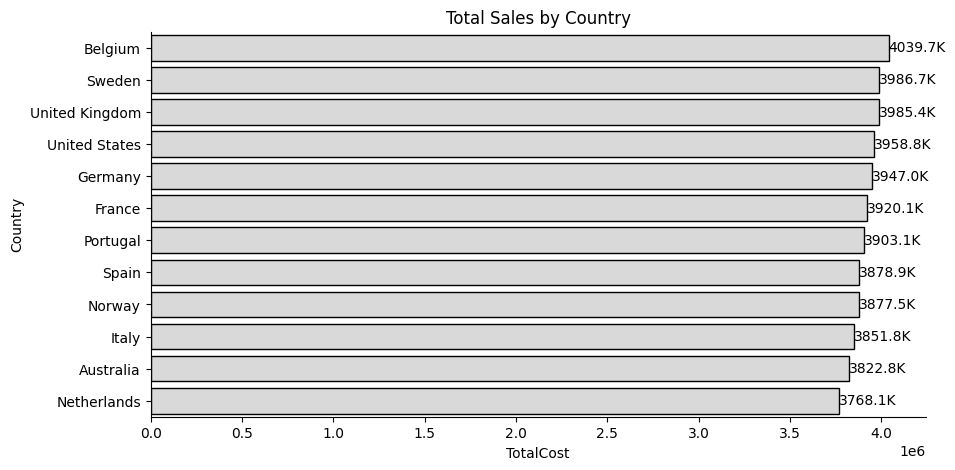

In [67]:
paletta = sns.light_palette("seagreen", n_colors=6)
plt.figure(figsize=(10,5))
ax = sns.barplot(data = total_cost_by_country, x = "TotalCost", y ="Country", ci = None, color="#d9d9d9" )
plt.title("Total Sales by Country")

for p in ax.patches:
        p.set_color('#D9D9D9') 
        p.set_linewidth(1)      
        p.set_edgecolor('black') 

for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-3:.1f}K', 
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')
    plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#### Payment Method Usage        

In [68]:
# We have identified the total number of payment methods.
payment_Method = df["PaymentMethod"].value_counts()
payment_Method

PaymentMethod
Bank Transfer    16439
Credit Card      16214
Paypall          16133
Name: count, dtype: int64

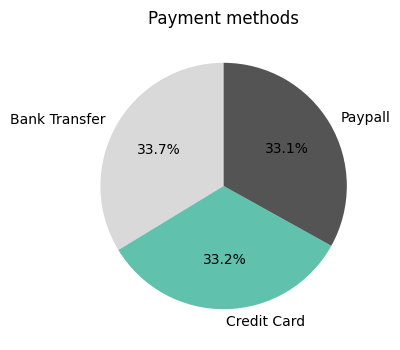

In [69]:
plt.figure()
plt.pie(payment_Method,
        labels=payment_Method.index,
        autopct='%1.1f%%', 
        startangle=90, 
        colors = ["#d9d9d9", "#60C1AD", "#545454"]
       )
plt.title("Payment methods");

#### Seasonal Sales Trends

In [70]:
# I used dictionary to categorize seasonally.
mevsimler = {
    1: 'Winter',  
    2: 'Winter',   
    3: 'Spring',   
    4: 'Spring',   
    5: 'Spring',   
    6: 'Summer',   
    7: 'Summer',   
    8: 'Summer',   
    9: 'Autumn',   
    10: 'Autumn',  
    11: 'Autumn',  
    12: 'Winter'  
}

In [71]:
# Fixed incorrect categorical names with the map function.
df['InvoiceSeason'] = df['InvoiceMonth'].map(mevsimler)

In [72]:
# Created dataframe to be used for visualization.
seasonal_trends = df.groupby("InvoiceSeason")[["TotalCost", "Quantity"]].sum(). reset_index()
seasonal_trends["sorting"] = [3,1,2,4]    
seasonal_trends = seasonal_trends.sort_values(by="sorting")
seasonal_trends

,InvoiceSeason,TotalCost,Quantity,sorting
1,Spring,12459055.37,324128,1
2,Summer,12444403.82,321194,2
0,Autumn,10509981.98,270901,3
3,Winter,11526452.81,299701,4


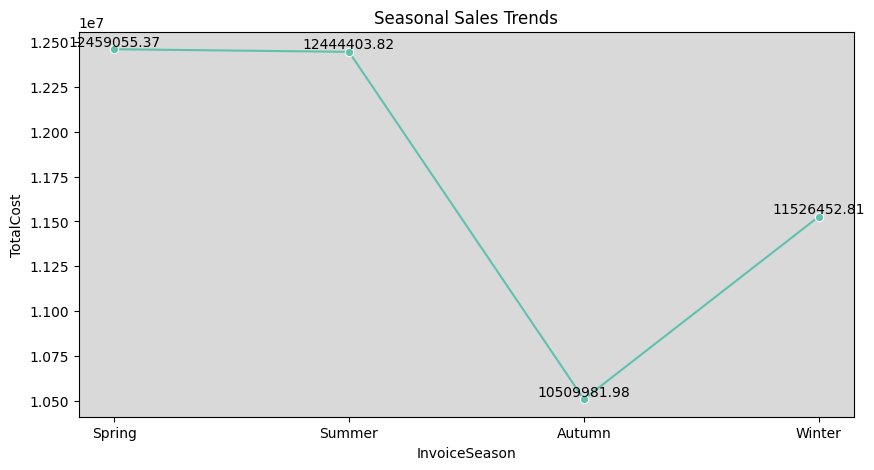

In [73]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data = seasonal_trends, x = "InvoiceSeason", y = "TotalCost", ci=None, marker = 'o', color= "#60C1AD" )
ax.set_facecolor("#d9d9d9")
for x, y in zip(seasonal_trends["InvoiceSeason"], seasonal_trends["TotalCost"]):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.title("Seasonal Sales Trends");

#### Total sales figures by month in Data

In [74]:
InvoiceMonth_Totalcost=df.groupby("InvoiceMonth")["TotalCost"].sum()
InvoiceMonth_Totalcost

InvoiceMonth
1     4200564.45
2     3832852.39
3     4209414.65
4     4091330.47
5     4158310.25
6     4064771.28
7     4134075.00
8     4245557.54
9     3524791.07
10    3549283.46
11    3435907.45
12    3493035.97
Name: TotalCost, dtype: float64

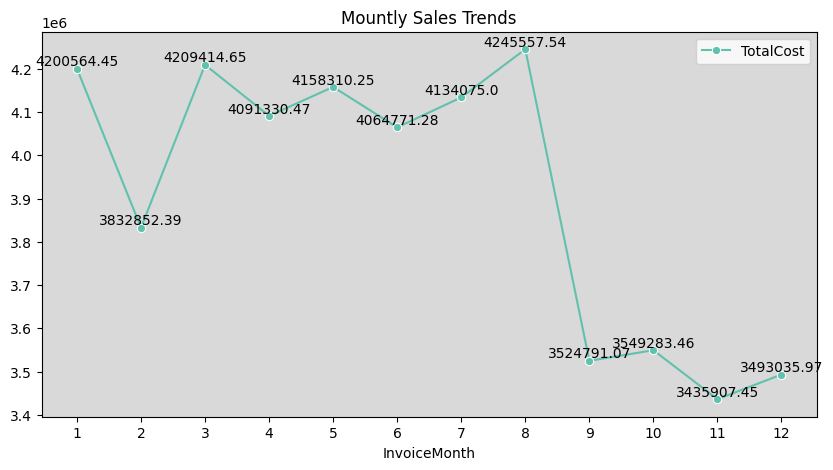

In [75]:
plt.figure(figsize=(10,5))
ax=sns.lineplot( x=InvoiceMonth_Totalcost.index, y=InvoiceMonth_Totalcost.values, marker='o',label="TotalCost", color= "#60C1AD")
plt.title("Mountly Sales Trends")
ax.set_facecolor("#d9d9d9")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12]);
for x, y in zip(InvoiceMonth_Totalcost.index, InvoiceMonth_Totalcost.values):
    plt.text(x, y, f'{y}',
             ha='center',
             va='bottom')

#### Quantity and Total Cost Correlation

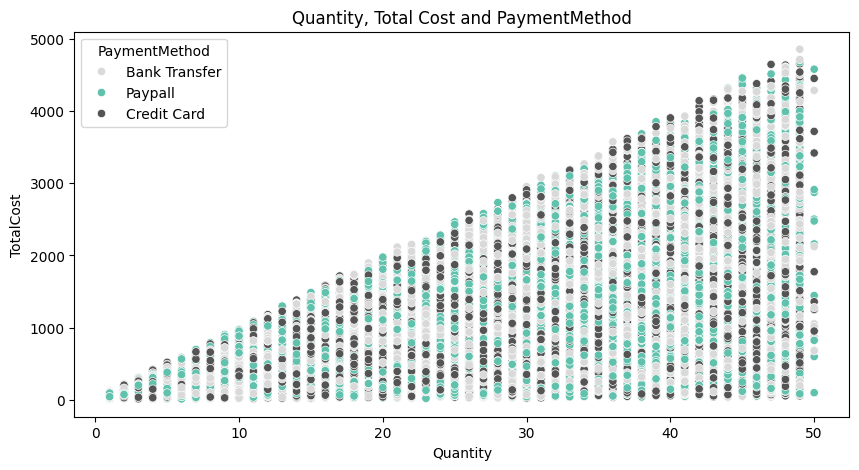

In [76]:
# Distribution of payment methods depending on Total Cost and Quantity
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "Quantity", y = "TotalCost", 
                palette={"#d9d9d9", "#60C1AD", "#545454"}, 
                hue = "PaymentMethod")
plt.title("Quantity, Total Cost and PaymentMethod");


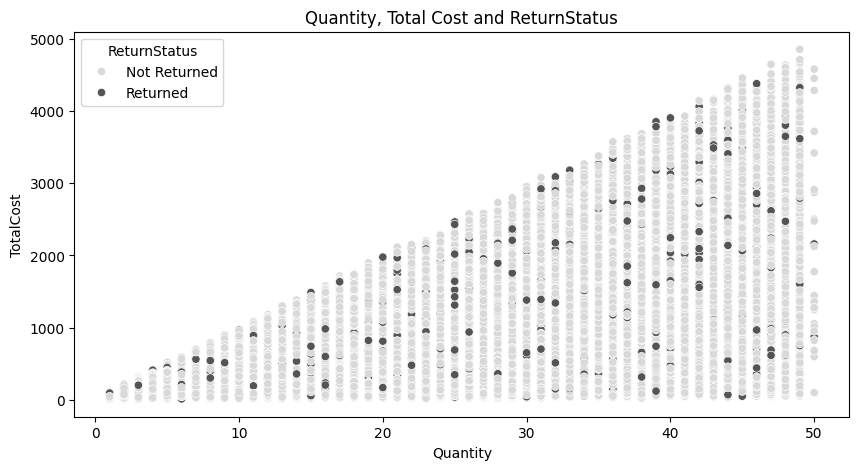

In [77]:
# Distribution of ReturnStatus depending on Total Cost and Quantity.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "Quantity", y = "TotalCost", 
                palette={"#d9d9d9", "#545454"}, 
                hue = "ReturnStatus")
plt.title("Quantity, Total Cost and ReturnStatus");

#### ShippingCost and Total Correlation

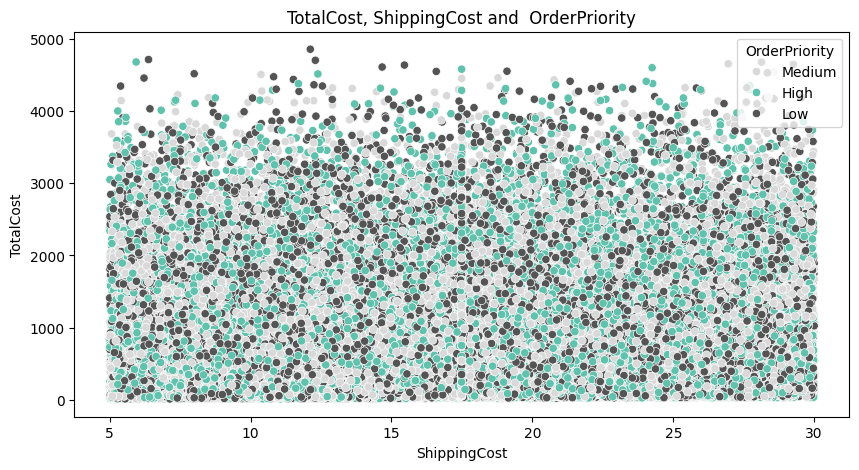

In [78]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "ShippingCost", y = "TotalCost", 
                palette={"#d9d9d9", "#60C1AD", "#545454"}, 
                hue = "OrderPriority")
plt.title("TotalCost, ShippingCost and  OrderPriority");

#### Correlation between ShippingCost and Quantity depending on OrderPriority.

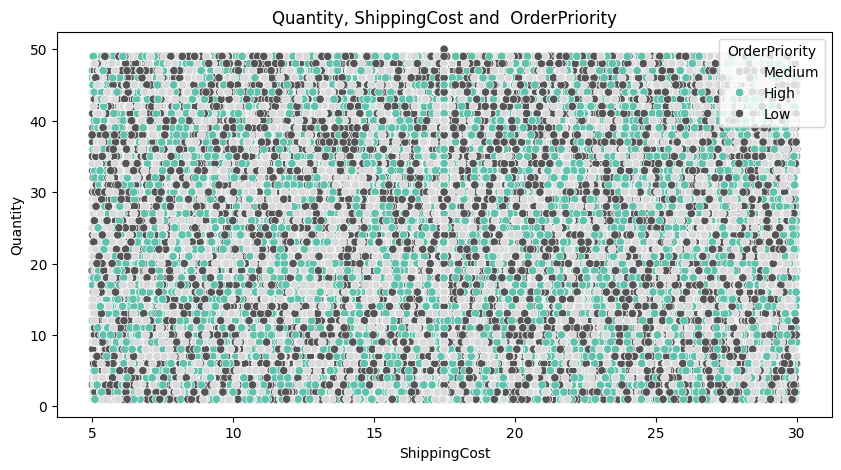

In [79]:
# Quantity distribution based on ShippingCost and TotalCost quantities.
plt.figure(figsize=(10,5))
sns.scatterplot(data = df, x = "ShippingCost", y = "Quantity", 
                palette={"#d9d9d9", "#60C1AD", "#545454"}, 
                hue = "OrderPriority")
plt.title("Quantity, ShippingCost and  OrderPriority");

#### Shipping Cost Analysis

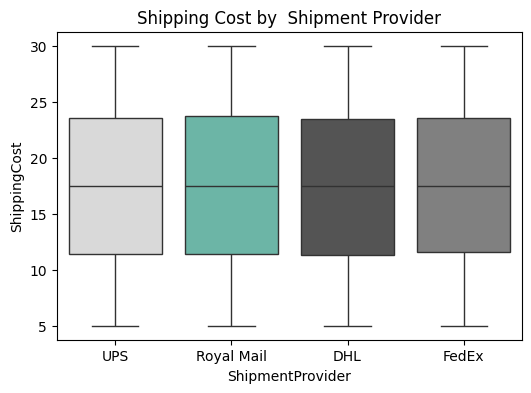

In [80]:
sns.boxplot(data = df, x = "ShipmentProvider", 
            y = "ShippingCost", 
            palette= {"#545454", "#d9d9d9", "#60C1AD", "#808080" }
           )
plt.title("Shipping Cost by  Shipment Provider");

#### Top Performing Products

In [81]:
# List of total sales volume by product
Top_Performing_Products=df.groupby("Description")["TotalCost"].sum().sort_values(ascending=False)
Top_Performing_Products

Description
White Mug         4388500.43
USB Cable         4341416.70
Desk Lamp         4284698.73
Wall Clock        4283150.15
Headphones        4277776.50
Backpack          4276568.39
Blue Pen          4273240.86
Wireless Mouse    4245664.21
Notebook          4201949.24
Office Chair      4192376.91
T-shirt           4174551.86
Name: TotalCost, dtype: float64

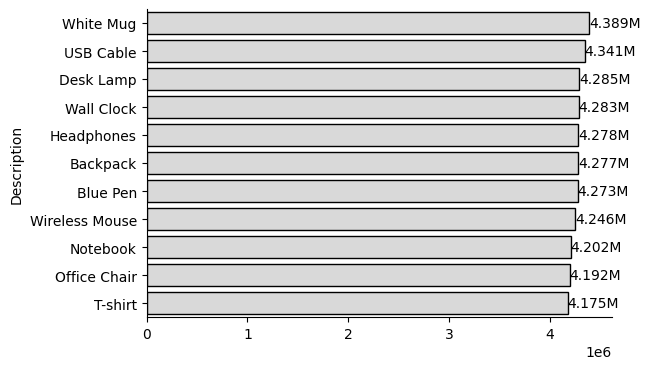

In [82]:
# Chart of total sales quantity to products
plt.figure()
ax=sns.barplot(x=Top_Performing_Products.values,y=Top_Performing_Products.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [83]:
# Top 10 products by revenue
Top_Performing_Products=df["Description"].value_counts()
Top_Performing_Products

Description
USB Cable         4502
Wall Clock        4501
Backpack          4480
Desk Lamp         4456
White Mug         4451
Headphones        4450
Office Chair      4431
Blue Pen          4417
T-shirt           4381
Notebook          4363
Wireless Mouse    4354
Name: count, dtype: int64

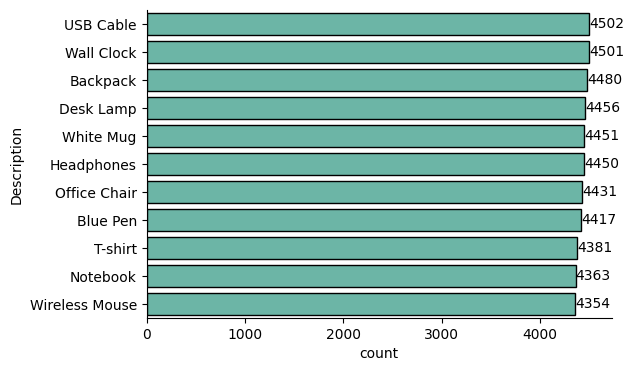

In [84]:
# Total sales figures by product
ax = sns.countplot(data = df, y = "Description", order = Top_Performing_Products.index, color="#60C1AD")
for p in ax.patches:
        p.set_edgecolor('black') # Kenar rengini ayarlama
        plt.gca().spines['top'].set_visible(False)
        plt.gca().spines['right'].set_visible(False)

for p in ax.containers:
    ax.bar_label(p);

#### Customer Behavior Analysis

In [85]:
# Here we calculated correlation in columns containing numerical values.
corr=df[["Quantity","TotalCost","ShippingCost"]].corr()

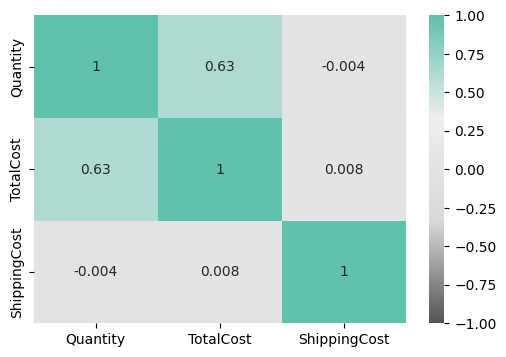

In [86]:
# Visualization with Heatmap

from matplotlib.colors import LinearSegmentedColormap

custom_cmap = LinearSegmentedColormap.from_list("custom_palette", ["#545454", "#d9d9d9", "#eeeeee", "#60C1AD"])

plt.figure()

sns.heatmap(corr, annot=True, cmap=custom_cmap, vmin=-1, vmax=1);

In this correlation relationship, there is a positive correlation of 0.63 between Total cost and Quantitiy, that is, there is a positive correlation, that is, when one increases, the other increases. Since the other relationships are very close to zero, we observed that there is no correlation, that is, there is no relationship between them.

#### Order Return Analysis

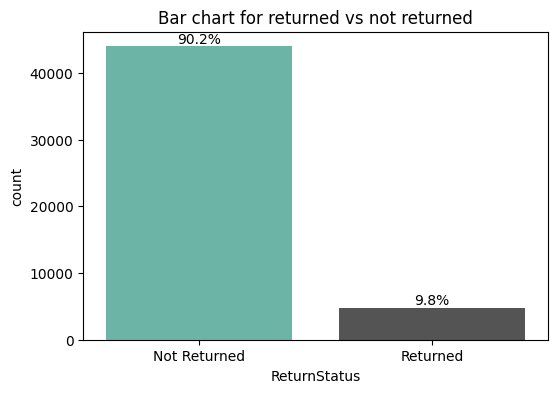

In [87]:
ax=sns.countplot(data=df,x="ReturnStatus",palette={"#545454","#60C1AD"})
total = len(df)
plt.title("Bar chart for returned vs not returned")
for p in ax.patches:
    height = p.get_height()  
    percentage = '{:.1f}%'.format(100 * height / total)  
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')  

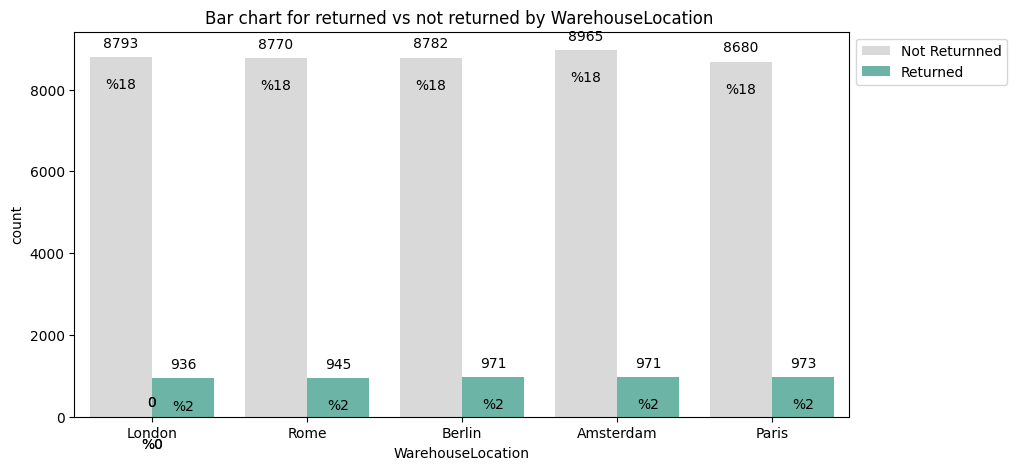

In [88]:
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "WarehouseLocation", hue = "ReturnStatus", palette={"#60C1AD","#D9D9D9"})
total = len(df)


total = len(df)


for p in ax.patches:
    height = p.get_height() 
    
 
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')
    plt.legend(['Not Returnned', 'Returned'], loc='upper left', bbox_to_anchor=(1, 1))
plt.title("Bar chart for returned vs not returned by WarehouseLocation ")

plt.show()

#### Sales Channel Analysis

In [89]:
# Total values of the SalesChannel column. 
Sales_Channel = df["SalesChannel"].value_counts()
Sales_Channel

SalesChannel
Online      24542
In-store    24244
Name: count, dtype: int64

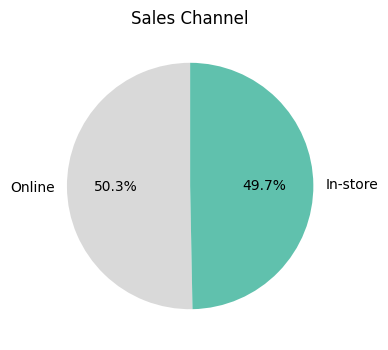

In [90]:
plt.figure()
plt.pie(Sales_Channel,
        labels=Sales_Channel.index,
        autopct='%1.1f%%', 
        startangle=90, 
        colors = ["#d9d9d9", "#60C1AD", "#545454"]
       )
plt.title("Sales Channel");

#### Payment method rates by product category

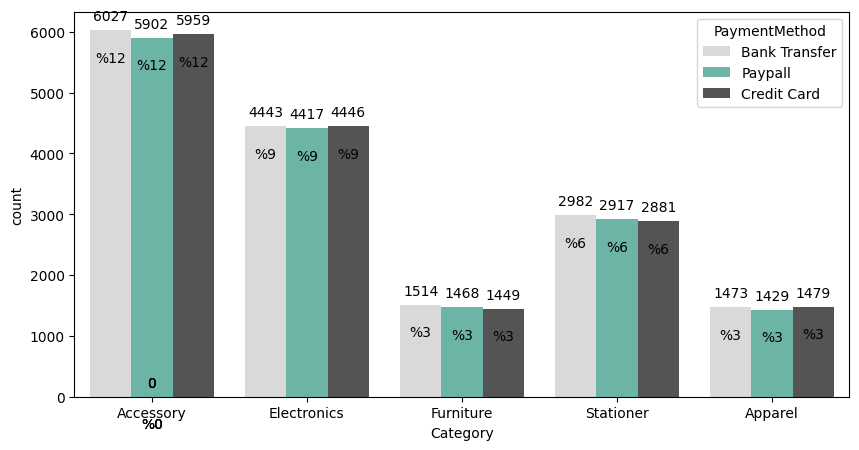

In [91]:
# We visualized the actual payment method rates by product category.
fig, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot(data = df, x = "Category", hue = "PaymentMethod", palette={"#545454","#60C1AD","#D9D9D9"})
total = len(df)


total = len(df)


for p in ax.patches:
    height = p.get_height() 
    
 
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., p.get_height() - 0.5), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    percentage = 100 * height / total
    ax.annotate(f'%{percentage:.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, -20), textcoords='offset points')

plt.show()

#### Top 10 CustomerID by  TotalCost

In [92]:
top_10_customer_id=df.groupby("CustomerID")["TotalCost"].sum().sort_values(ascending=False).head(11)
top_10_customer_id=pd.DataFrame(top_10_customer_id).reset_index()
top_10_customer_id=top_10_customer_id[top_10_customer_id["CustomerID"] != "Unknown"]
top_10_customer_id

,CustomerID,TotalCost
1,84431,9824.97
2,81067,9741.42
3,81631,8776.23
4,98923,8719.21
5,80001,8599.53
6,76402,8269.63
7,29700,8068.44
8,72172,7913.42
9,52808,7883.90
10,26371,7763.11


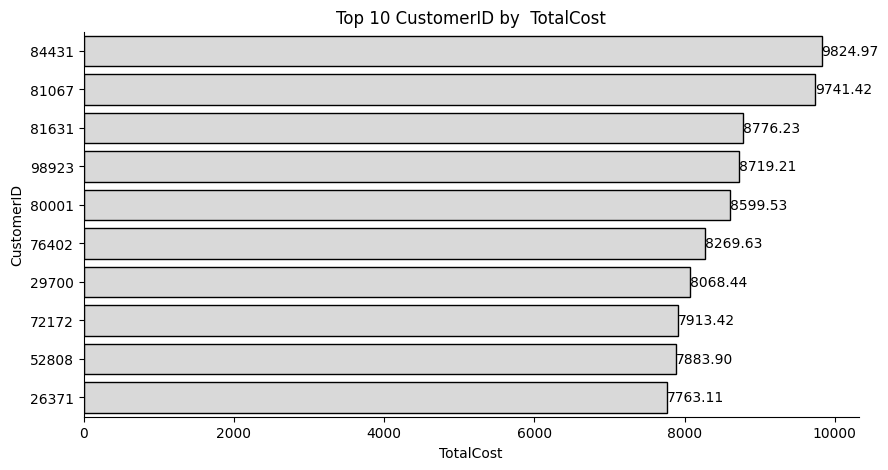

In [93]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_customer_id,y="CustomerID",x="TotalCost")
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
plt.title("Top 10 CustomerID by  TotalCost")
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [94]:
# List of invoice number of Customer IDs in the Top 10 List
customer_ids = ['84431', '81067', '81631', '98923', '80001', '76402', '29700', '72172', '52808', '26371']

# Filter CustomerIDs and count them with value_counts
top_10_Invoice_count = pd.DataFrame(df[df["CustomerID"].isin(customer_ids)]["CustomerID"].value_counts()).reset_index()
top_10_Invoice_count

,CustomerID,count
0,81631,5
1,76402,4
2,80001,4
3,72172,3
4,81067,3
5,52808,3
6,98923,3
7,26371,3
8,84431,3
9,29700,2


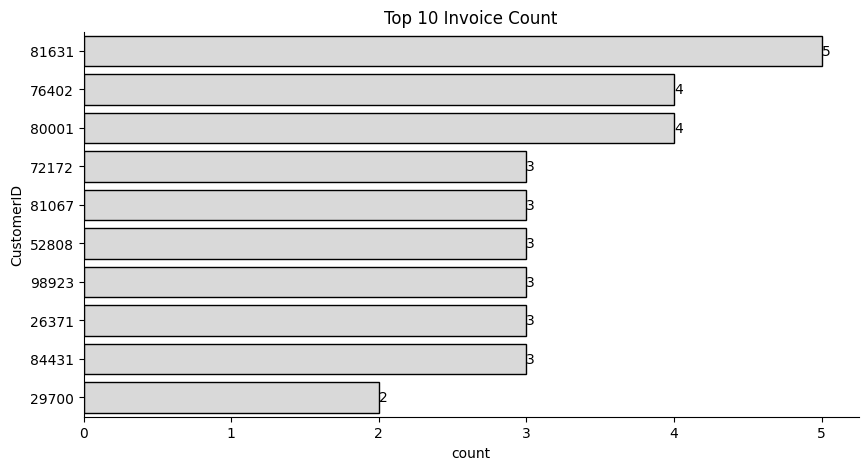

In [95]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=top_10_Invoice_count,y="CustomerID",x="count")
plt.title("Top 10 Invoice Count")
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-0:.0f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

#### Top 10 Product

In [96]:
product_count=df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
product_count

Description
USB Cable         113136
Wall Clock        112210
White Mug         111862
Backpack          111267
Desk Lamp         111006
Blue Pen          110113
Office Chair      109938
Headphones        109855
Wireless Mouse    109718
T-shirt           108622
Notebook          108197
Name: Quantity, dtype: int64

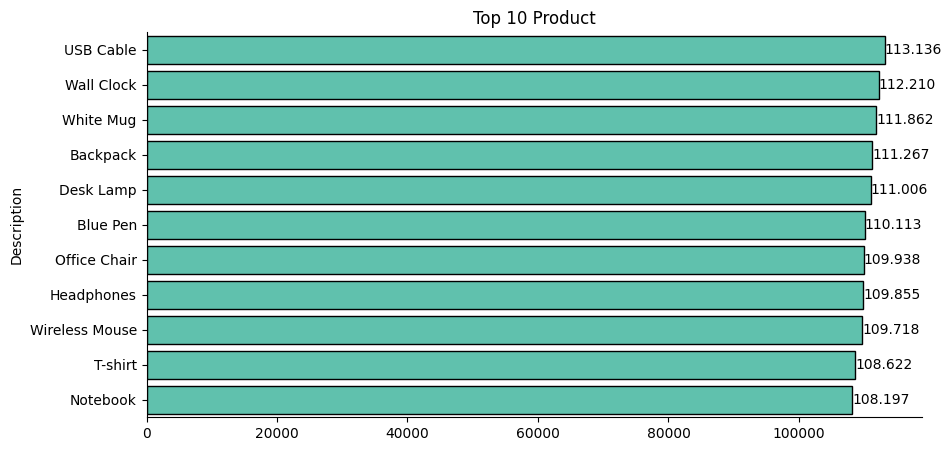

In [97]:
plt.figure(figsize=(10,5))
ax=sns.barplot(
    x=product_count.values,
    y=product_count.index,
    color="#60C1AD"
              );
plt.title("Top 10 Product")
for p in ax.patches:
        p.set_color('#60C1AD')  
        p.set_linewidth(1)     
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-3:.3f}',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

#### Total Revenue after Discount

In [98]:
# Calculate Total Revenue after discount
# Formula: Revenue = Quantity * (UnitPrice - Discount)
df['Revenue'] = df['Quantity'] * (df['UnitPrice'] - df['Discount'])
total_revenue = df['Revenue'].sum()
print(total_revenue)

61144777.99


In [99]:
# Calculate Average Discount by Category
average_discount_by_category = df.groupby('Category')['Discount'].mean()
print(average_discount_by_category)

Category
Accessory      0.250111
Apparel        0.251625
Electronics    0.250471
Furniture      0.253214
Stationer      0.250170
Name: Discount, dtype: float64


In [100]:
# Calculate Return Rate
# Return rate is the percentage of transactions marked as "Returned"
return_rate = df['ReturnStatus'].value_counts(normalize=True).get('Returned', 0) * 100
print(return_rate)

9.83068913212807


#### Revenue by Country

In [101]:
# Sum up the revenue for each country
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

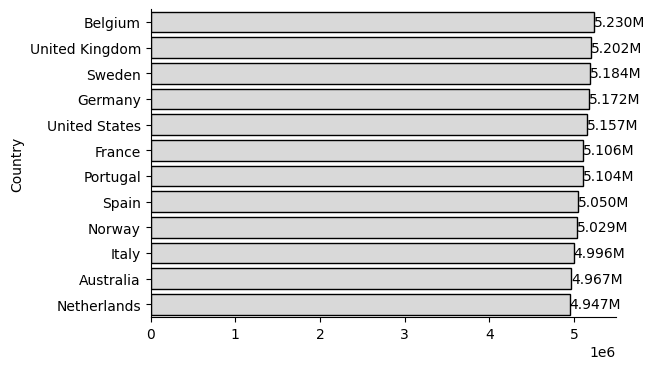

In [102]:
plt.figure()
ax=sns.barplot(x=revenue_by_country.values,y=revenue_by_country.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [103]:
# Average Shipping Cost by Shipment Provider
avg_shipping_cost_by_provider = df.groupby('ShipmentProvider')['ShippingCost'].mean()
print(avg_shipping_cost_by_provider)

ShipmentProvider
DHL           17.444643
FedEx         17.542971
Royal Mail    17.559002
UPS           17.430506
Name: ShippingCost, dtype: float64


In [104]:
# Sales Channel Comparison (Online vs In-store)
revenue_by_sales_channel = df.groupby('SalesChannel')['Revenue'].sum()
print(revenue_by_sales_channel)

SalesChannel
In-store    30445736.14
Online      30699041.85
Name: Revenue, dtype: float64


In [105]:
# Revenue by Order Priority
revenue_by_order_priority = df.groupby('OrderPriority')['Revenue'].sum()
print(revenue_by_order_priority)

OrderPriority
High      20311435.62
Low       20318444.16
Medium    20514898.21
Name: Revenue, dtype: float64


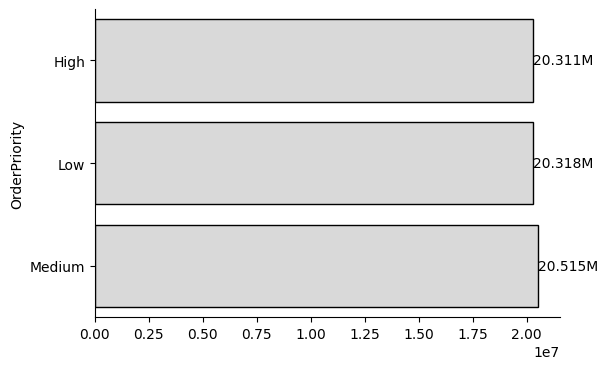

In [106]:
plt.figure()
ax=sns.barplot(x=revenue_by_order_priority.values,y=revenue_by_order_priority.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [107]:
# Customer Purchase Frequency
# Count transactions per customer and sort to identify the most frequent customers
customer_purchase_frequency = df['CustomerID'].value_counts().head(10)
print(customer_purchase_frequency)

CustomerID
Unknown    3982
53125         6
63229         5
81806         5
12591         5
14461         5
78858         5
81631         5
11514         5
91749         5
Name: count, dtype: int64


#### Revenue and Discount Analysis

In [108]:
# Revenue and Discount Analysis
# Calculate total revenue for transactions with discounts vs. without discounts
revenue_with_discount = df[df['Discount'] > 0]['Revenue'].sum()
revenue_without_discount = df[df['Discount'] == 0]['Revenue'].sum()
print(revenue_with_discount)
print(revenue_without_discount)


60487848.92
656929.07


In [109]:
# Category-Based Revenue
# Sum up revenue for each category
revenue_by_category = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
revenue_by_category

Category
Accessory      22454311.62
Electronics    16728858.59
Stationer      11032083.94
Furniture       5482019.23
Apparel         5447504.61
Name: Revenue, dtype: float64

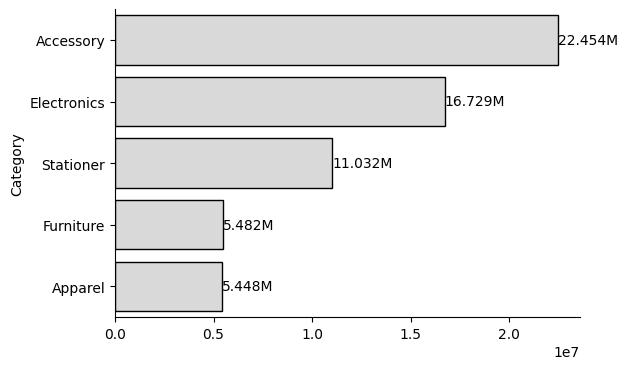

In [110]:
plt.figure()
ax=sns.barplot(x=revenue_by_category.values,y=revenue_by_category.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [111]:
# Return Rate by Product and Category
# Calculate return rate by product and by category
return_rate_by_product = df.groupby('Description')['ReturnStatus'].apply(lambda x: (x == 'Returned').mean()).sort_values(ascending=False)
return_rate_by_category = df.groupby('Category')['ReturnStatus'].apply(lambda x: (x == 'Returned').mean()).sort_values(ascending=False)
print(return_rate_by_product)
print(return_rate_by_category)

Description
Notebook          0.105432
Wall Clock        0.101977
Blue Pen          0.100974
USB Cable         0.100622
T-shirt           0.099749
Wireless Mouse    0.097611
Backpack          0.096205
Desk Lamp         0.096050
Headphones        0.095056
White Mug         0.094585
Office Chair      0.093207
Name: ReturnStatus, dtype: float64
Category
Stationer      0.103189
Apparel        0.099749
Electronics    0.097775
Accessory      0.097216
Furniture      0.093207
Name: ReturnStatus, dtype: float64


In [ ]:
# Payment Method Analysis
# Count of transactions and total revenue by payment method
payment_method_counts = df['PaymentMethod'].value_counts()
revenue_by_payment_method = df.groupby('PaymentMethod')['Revenue'].sum().sort_values(ascending=False)
revenue_by_payment_method

PaymentMethod
Bank Transfer    20741332.02
Paypall          20237724.23
Credit Card      20165721.74
Name: Revenue, dtype: float64

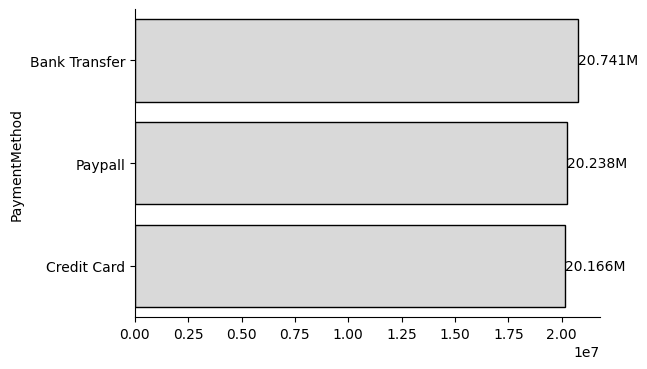

In [113]:
plt.figure()
ax=sns.barplot(x=revenue_by_payment_method.values,y=revenue_by_payment_method.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')

In [114]:
# Shipping Cost vs. Revenue Correlation
# Correlation between shipping cost and revenue
shipping_revenue_correlation = df[['ShippingCost', 'Revenue']].corr().loc['ShippingCost', 'Revenue']
print(shipping_revenue_correlation)

-0.002035084921574275


In [115]:
# Warehouse Location Performance
# Revenue and return rate by warehouse location
revenue_by_warehouse = df.groupby('WarehouseLocation')['Revenue'].sum().sort_values(ascending=False)
return_rate_by_warehouse = df.groupby('WarehouseLocation')['ReturnStatus'].apply(lambda x: (x == 'Returned').mean()).sort_values(ascending=False)
print(revenue_by_warehouse)
print(return_rate_by_warehouse)

WarehouseLocation
Amsterdam    12353192.04
Berlin       12326807.03
London       12227148.14
Rome         12212623.34
Paris        12025007.44
Name: Revenue, dtype: float64
WarehouseLocation
Paris        0.100798
Berlin       0.099559
Amsterdam    0.097725
Rome         0.097272
London       0.096207
Name: ReturnStatus, dtype: float64


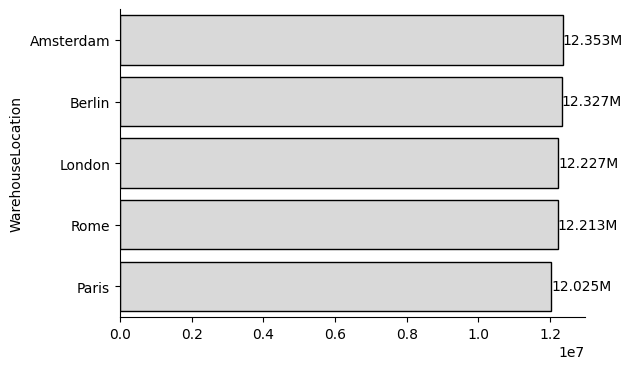

In [116]:
plt.figure()
ax=sns.barplot(x=revenue_by_warehouse.values,y=revenue_by_warehouse.index)
for p in ax.patches:
        p.set_color('#D9D9D9')  
        p.set_linewidth(1)      
        p.set_edgecolor('black') 
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
for p in ax.patches:
    ax.annotate(f'{p.get_width() * 1e-6:.3f}M',
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center')